<h3> v1_world-happiness-report-2017.csv </h3> 
<h2> CU TOOL </h2>
* să se realizeze o predicție a gradului de fericire în funcție de Produsul intern brut



In [12]:
# prerequisites
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics

In [2]:
def normalizare(dt):
    mean = np.mean(dt)
    std_dev = np.std(dt)
    normalized_data = (dt - mean) / std_dev
    return normalized_data

Functie care citeste si proceseaza datele

In [8]:
def citireDate(numeFisier, numeVariabilaOutput, numeVariabilaInput1, inputVariabName2 = None):
    data = []
    dataNames = []
    with open(numeFisier) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1

    indexOutput = dataNames.index(numeVariabilaOutput)
    outputs = [float(row[indexOutput]) for row in data]
    outputs = normalizare(outputs)

    indexInput1 = dataNames.index(numeVariabilaInput1)
    input1 = [float(row[indexInput1]) if row[indexInput1] != '' else None for row in data]
    mean_input1 = sum([val for val in input1 if val is not None]) / len([val for val in input1 if val is not None])
    for i in range(len(input1)):
        if input1[i] is None:
            input1[i] = mean_input1
    input1 = normalizare(input1)

    input2 = []

    if inputVariabName2 is not None:
        indexInput2 = dataNames.index(inputVariabName2)
        input2 = [float(row[indexInput2]) if row[indexInput2] != '' else None for row in data]
        mean_input2 = sum([val for val in input2 if val is not None]) / len([val for val in input2 if val is not None])
        for i in range(len(input2)):
            if input2[i] is None:
                input2[i] = mean_input2
        input2 = normalizare(input2)

    if not len(input2):
        return outputs, input1
    else:
        return outputs, input1, input2

In [4]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10, color='teal')  
    plt.title('Histogram of ' + variableName)
    plt.show()
    
def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'o', color='teal', label='train data')         
    if x2:
        plt.plot(x2, y2, '-', color='purple', label='learnt model') 
    if x3:
        plt.plot(x3, y3, '^', color='darkorange', label='test data') 
    plt.title(title)
    plt.legend()
    plt.show()

Functie care imparte datele in 80% training si 20% testing 

In [5]:
def separate_date(inputs, outputs):
  np.random.seed(5)
  indexes = [i for i in range(len(inputs))]
  trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
  validationSample = [i for i in indexes  if not i in trainSample]
  trainInputs = [inputs[i] for i in trainSample]
  trainOutputs = [outputs[i] for i in trainSample]
  validationInputs = [inputs[i] for i in validationSample]
  validationOutputs = [outputs[i] for i in validationSample]
  return trainInputs, trainOutputs, validationInputs, validationOutputs

Vedem grafic cum invata modelul

In [15]:
def plot_model(trainInputs, trainOutputs, w0, w1):
    noOfPoints = 1000
    xref = []
    val = min(trainInputs)
    step = (max(trainInputs) - min(trainInputs)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref]
    
    plt.plot(trainInputs, trainOutputs, 'o', color='teal', label='train data')
    plt.plot(xref, yref, '-', color='purple', label='learnt model')
    plt.title("train data and model")
    plt.legend()
    plt.show()

In [6]:
def compute_error(validationOutputs, computedValidationOutputs):
  error = 0.0
  for t1, t2 in zip(computedValidationOutputs, validationOutputs):
      error += (t1 - t2) ** 2
  error = error / len(validationOutputs)
  print("prediction error (manual): ", error)

  error = metrics.mean_squared_error(validationOutputs, computedValidationOutputs)
  print("prediction error (tool): ", error)

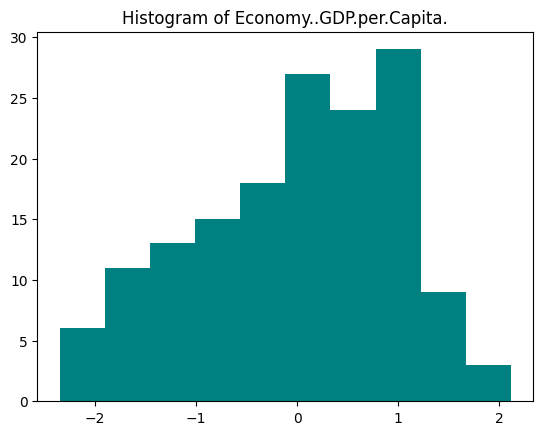

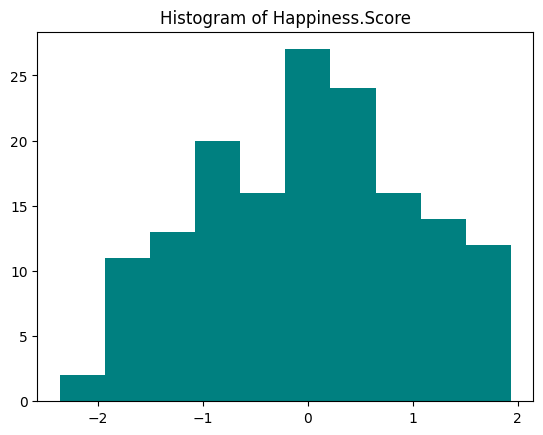

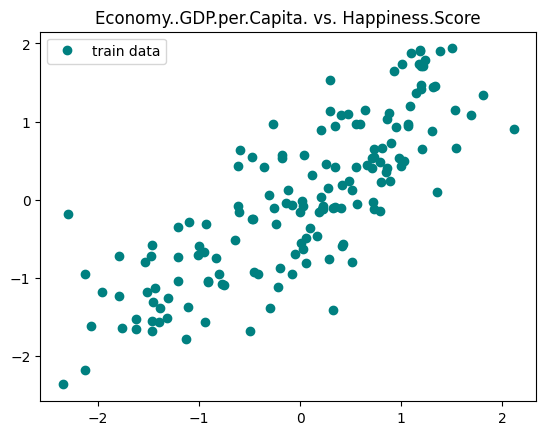

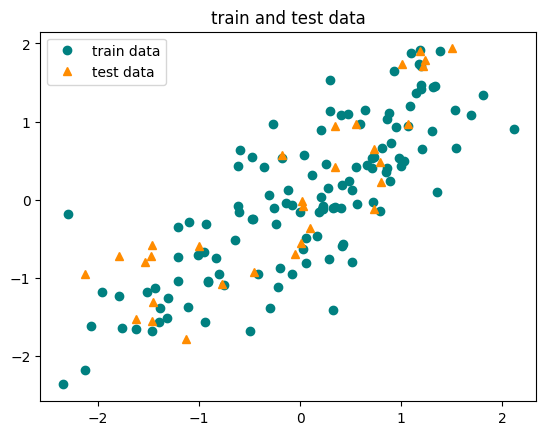

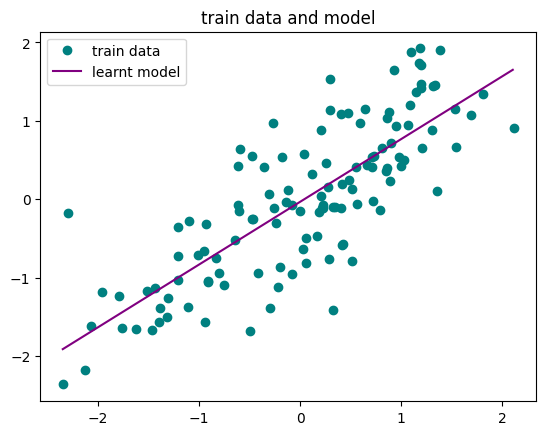

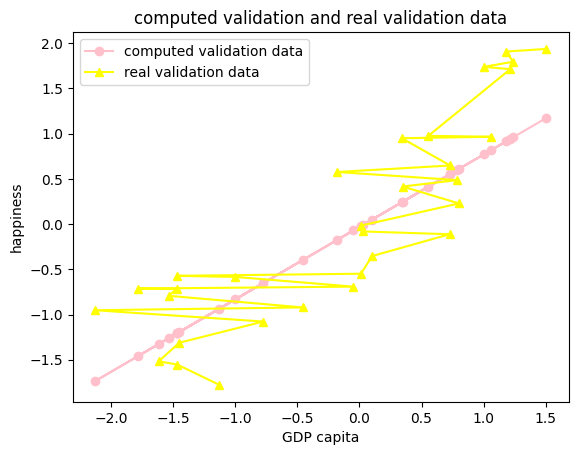

prediction error (manual):  0.32578553890299705
prediction error (tool):  0.325785538902997


In [18]:
def make_prediction(filePath, inputVariable, outputVariable):
  outputs, inputs = citireDate(filePath, outputVariable, inputVariable, inputVariabName2=None)

  plotDataHistogram(inputs, inputVariable)
  plotDataHistogram(outputs, outputVariable)

  plotData(inputs, outputs, [], [], [], [], inputVariable + " vs. " + outputVariable)

  trainInputs, trainOutputs, validationInputs, validationOutputs = separate_date(inputs,outputs)
  plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")
  xx = [[el] for el in trainInputs]
  regressor = linear_model.LinearRegression()
  regressor.fit(xx, trainOutputs)
  w0, w1 = regressor.intercept_, regressor.coef_

  plot_model(trainInputs, trainOutputs, w0, w1)
  computedValidationOutputs = regressor.predict([[x] for x in validationInputs])

  plt.plot(validationInputs, computedValidationOutputs, marker='o', color='pink', label='computed validation data')
  plt.plot(validationInputs, validationOutputs, marker='^', color='yellow', label='real validation data')
  plt.title('computed validation and real validation data')
  plt.xlabel('GDP capita')
  plt.ylabel('happiness')
  plt.legend()
  plt.show()

  compute_error(validationOutputs, computedValidationOutputs)
  
filePath = "v1_world-happiness-report-2017.csv"
inputVariable = 'Economy..GDP.per.Capita.'
outputVariable = 'Happiness.Score'
make_prediction(filePath, inputVariable, outputVariable)

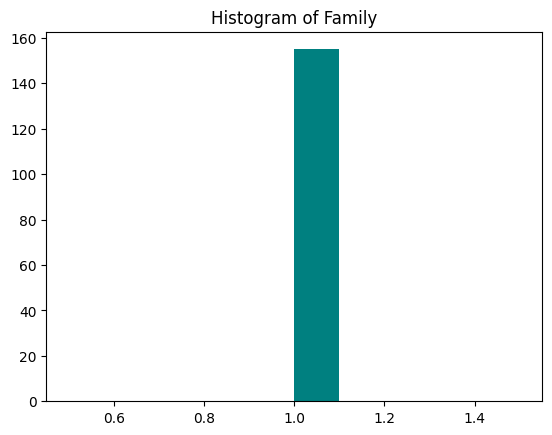

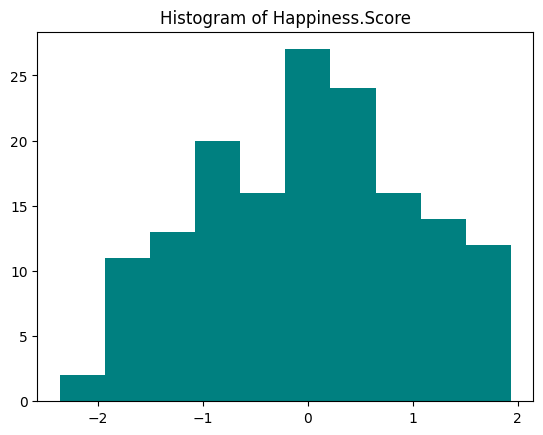

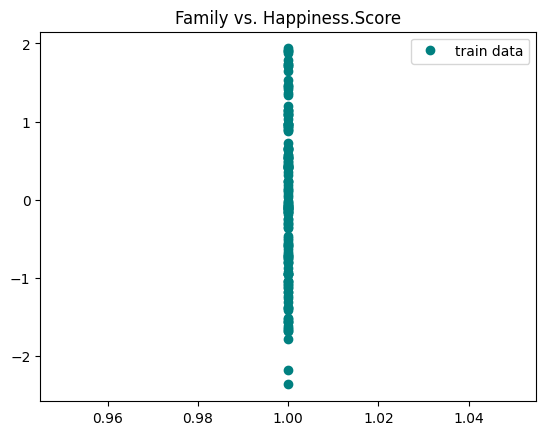

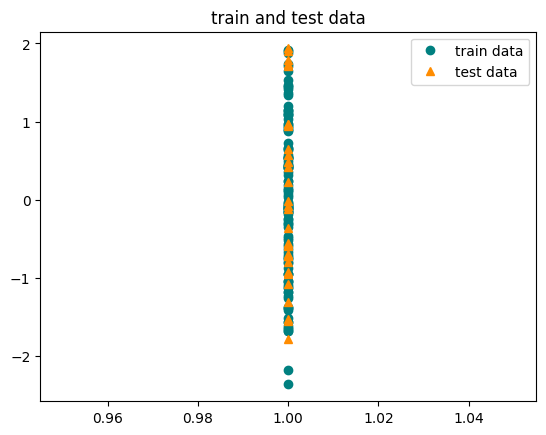

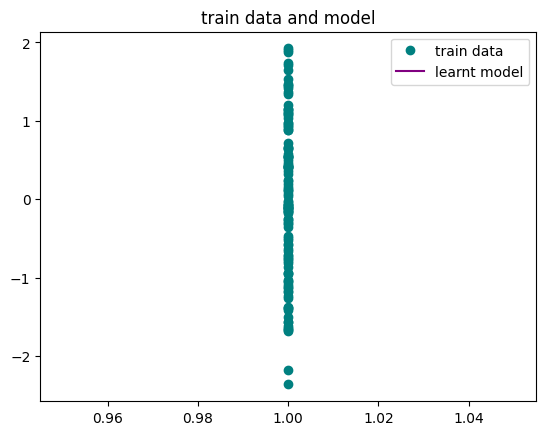

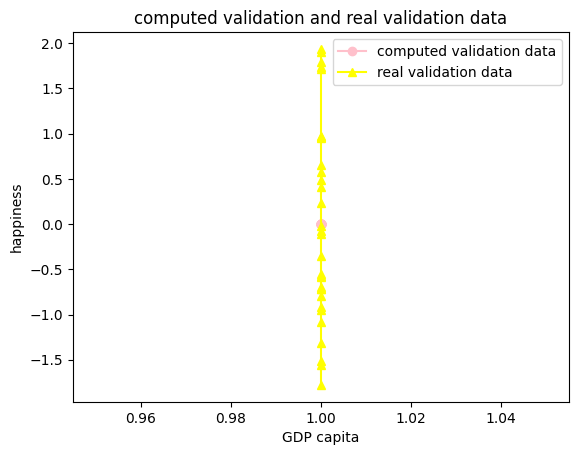

prediction error (manual):  1.1711027958450777
prediction error (tool):  1.1711027958450777


In [20]:
filePath = "v1_world-happiness-report-2017.csv"

inputVariable = 'Family'
outputVariable = 'Happiness.Score'

make_prediction(filePath, inputVariable, outputVariable)

GDP + happiness + freedom

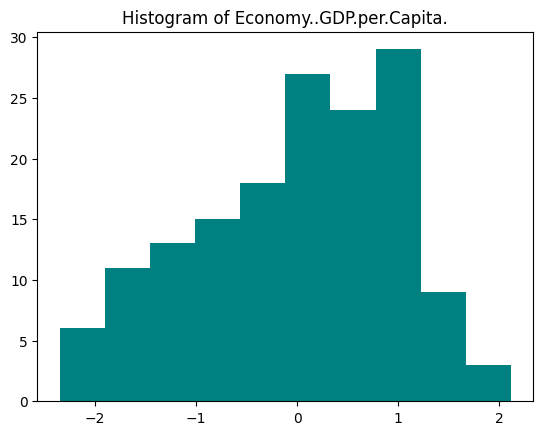

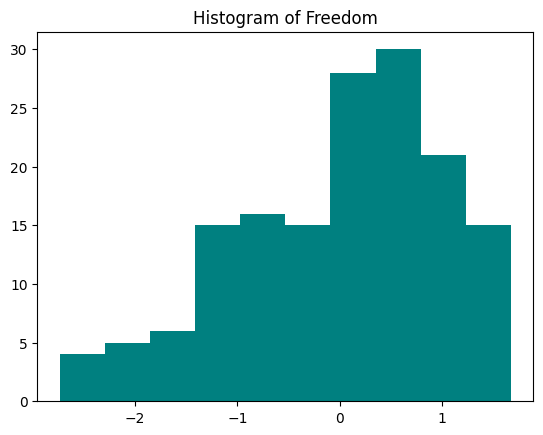

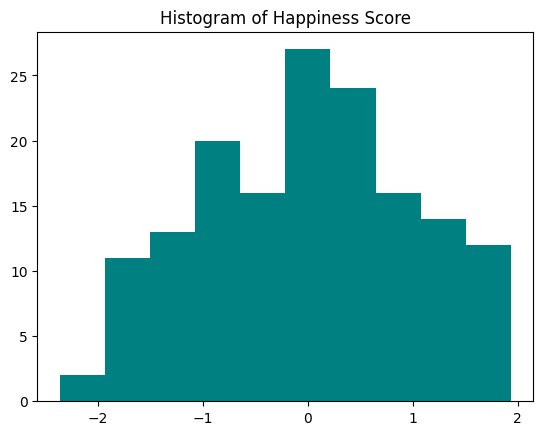

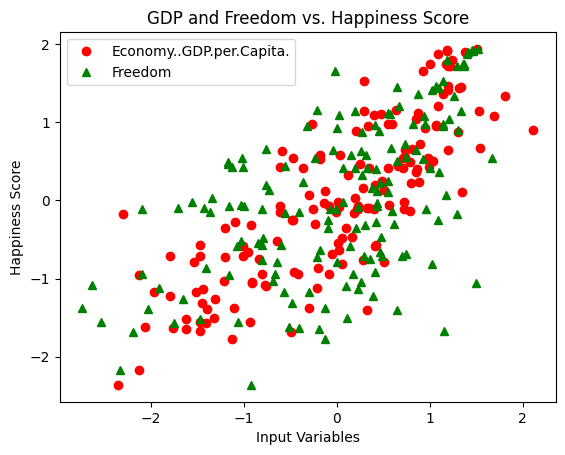

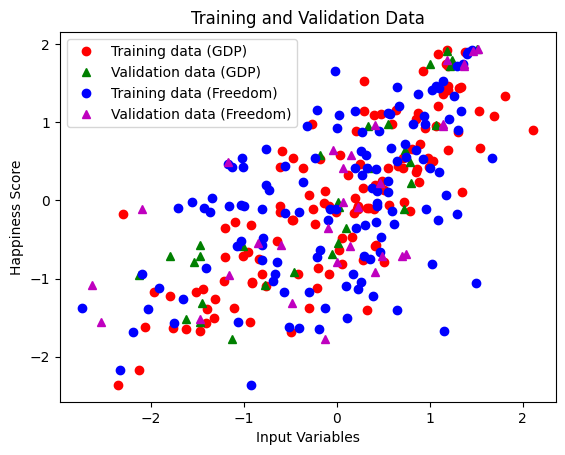

Learned model: f(x1, x2) =  -0.02815893592597309  +  0.6979567354263436  * x1 +  0.3069278912329719  * x2


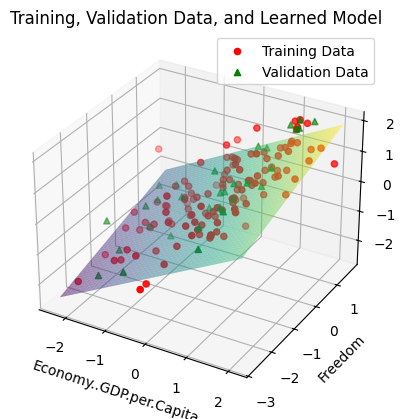

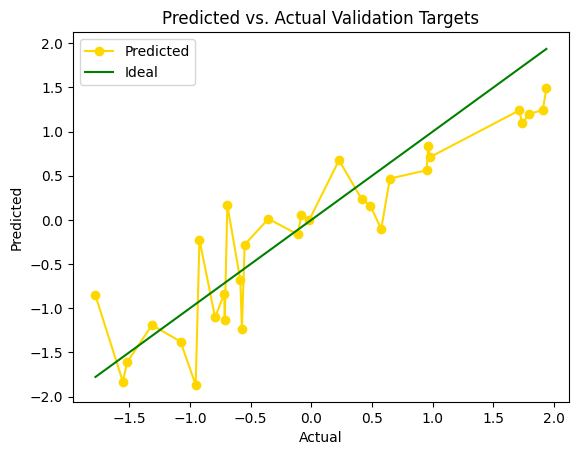

prediction error (manual):  0.2185159430674899
prediction error (tool):  0.21851594306748995


In [22]:
file_path = "v1_world-happiness-report-2017.csv"

input_var1 = 'Economy..GDP.per.Capita.'
input_var2 = 'Freedom'
output_var = 'Happiness.Score'

target_values, feature1, feature2 = citireDate(file_path, output_var, input_var1, input_var2)

plotDataHistogram(feature1, input_var1)
plotDataHistogram(feature2, input_var2)
plotDataHistogram(target_values, 'Happiness Score')

plt.plot(feature1, target_values, 'ro', label='Economy..GDP.per.Capita.')
plt.plot(feature2, target_values, 'g^', label='Freedom')
plt.xlabel('Input Variables')
plt.ylabel('Happiness Score')
plt.title('GDP and Freedom vs. Happiness Score')
plt.legend()
plt.show()

features = np.column_stack((feature1, feature2))

np.random.seed(5)
all_indices = np.arange(len(feature1))
train_indices = np.random.choice(all_indices, int(0.8 * len(feature1)), replace=False)
validation_indices = np.array([i for i in all_indices if i not in train_indices])

train_features = features[train_indices]
train_targets = np.array([target_values[i] for i in train_indices])

validation_features = features[validation_indices]
validation_targets = np.array([target_values[i] for i in validation_indices])

plt.plot(train_features[:, 0], train_targets, 'ro', label='Training data (GDP)')
plt.plot(validation_features[:, 0], validation_targets, 'g^', label='Validation data (GDP)')
plt.plot(train_features[:, 1], train_targets, 'bo', label='Training data (Freedom)')
plt.plot(validation_features[:, 1], validation_targets, 'm^', label='Validation data (Freedom)')
plt.title('Training and Validation Data')
plt.xlabel('Input Variables')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

regressor = linear_model.LinearRegression()
regressor.fit(train_features, train_targets)
intercept, coef1, coef2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('Learned model: f(x1, x2) = ', intercept, ' + ', coef1, ' * x1 + ', coef2, ' * x2')


num_points = 1000
x1_range = np.linspace(min(feature1), max(feature1), num_points)
x2_range = np.linspace(min(feature2), max(feature2), num_points)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
Y_grid = intercept + coef1 * X1_grid + coef2 * X2_grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_features[:, 0], train_features[:, 1], train_targets, c='r', marker='o', label='Training Data')
ax.scatter(validation_features[:, 0], validation_features[:, 1], validation_targets, c='g', marker='^', label='Validation Data')
ax.plot_surface(X1_grid, X2_grid, Y_grid, alpha=0.5, cmap='viridis')
ax.set_xlabel('Economy..GDP.per.Capita.')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness Score')
plt.title('Training, Validation Data, and Learned Model')
plt.legend()
plt.show()

predicted_validation_targets = regressor.predict(validation_features)

plt.plot(validation_targets, predicted_validation_targets, marker='o', color='gold', label='Predicted')
plt.plot(validation_targets, validation_targets, color='green', label='Ideal')
plt.title('Predicted vs. Actual Validation Targets')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

compute_error(validation_targets, predicted_validation_targets)


<h1> V1 - FARA TOOL </H1>

In [27]:
class MyLinearUnivariateRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = 0.0
    

    def fit(self, x, y):
     sum_x = sum(x)
     sum_y = sum(y)
     sum_x_squared = sum(val * val for val in x)
     sum_xy = sum(x_val * y_val for x_val, y_val in zip(x, y))

     denominator = len(x) * sum_x_squared - sum_x * sum_x

     if denominator == 0:
        raise ValueError("All x values are identical. Cannot compute linear regression.")

     slope = (len(x) * sum_xy - sum_x * sum_y) / denominator
     intercept = (sum_y - slope * sum_x) / len(x)

     self.intercept_, self.coef_ = intercept, slope
    

    def predict(self, x):
    
        if isinstance(x[0], list):
            return [self.intercept_ + self.coef_ * val[0] for val in x]
        else:
            return [self.intercept_ + self.coef_ * val for val in x]


In [32]:
class MyLinearBivariateRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = [0.0, 0.0]

    def fit(self, x, y):
        sum_x1 = sum(x_i[0] for x_i in x)
        sum_x2 = sum(x_i[1] for x_i in x)
        sum_y = sum(y)

        n = len(x)

        sum_x1y = sum(x[i][0] * y[i] for i in range(n))
        sum_x2y = sum(x[i][1] * y[i] for i in range(n))
        sum_x1x1 = sum(x[i][0] ** 2 for i in range(n))
        sum_x2x2 = sum(x[i][1] ** 2 for i in range(n))

        self.coef_[0] = (n * sum_x1y - sum_x1 * sum_y) / (n * sum_x1x1 - sum_x1 ** 2)
        self.coef_[1] = (n * sum_x2y - sum_x2 * sum_y) / (n * sum_x2x2 - sum_x2 ** 2)

        self.intercept_ = (sum_y - self.coef_[0] * sum_x1 - self.coef_[1] * sum_x2) / n

    def predict(self, x):
        if isinstance(x[0], list):
            return [self.intercept_ + self.coef_[0] * val[0] + self.coef_[1] * val[1] for val in x]
        else:
            return [self.intercept_ + self.coef_[0] * val + self.coef_[1] * val for val in x]

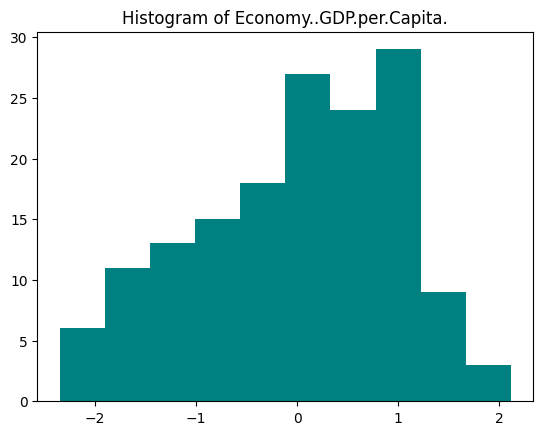

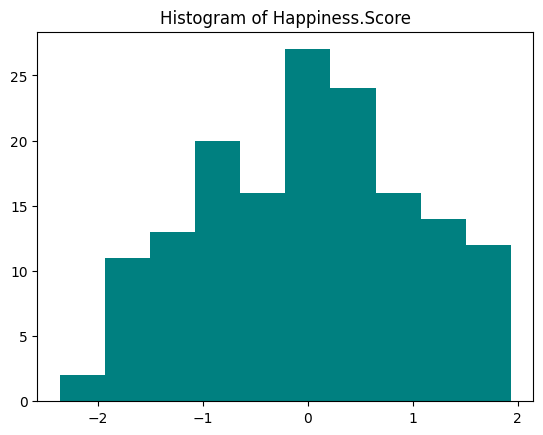

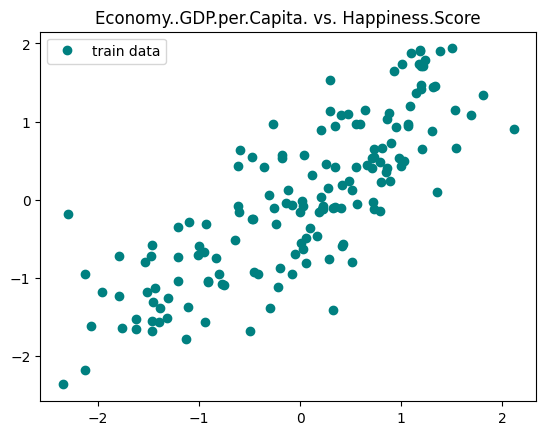

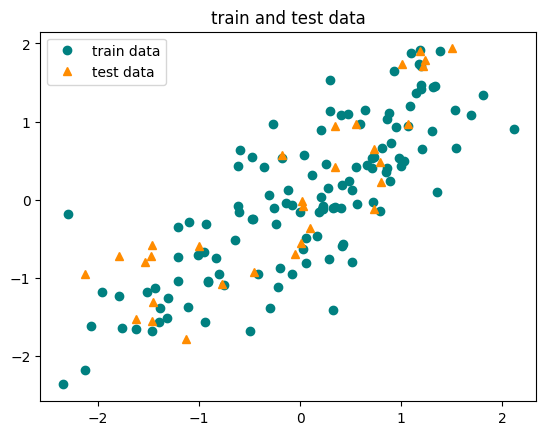

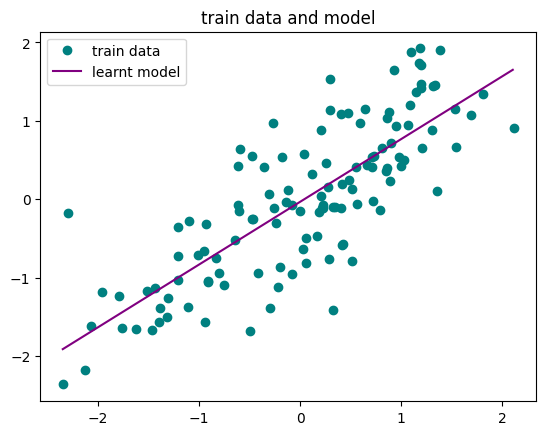

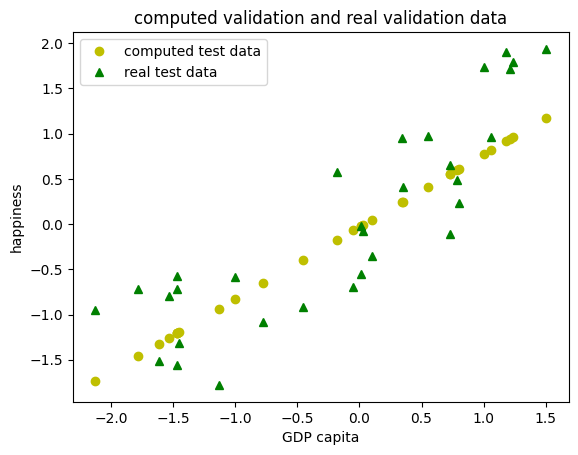

prediction error (manual):  0.32578553890299705
prediction error (tool):  0.32578553890299705


In [30]:
def make_prediction(filePath, inputVariable, outputVariable):
  outputs, inputs = citireDate(filePath, outputVariable, inputVariable, inputVariabName2=None)

  plotDataHistogram(inputs, inputVariable)
  plotDataHistogram(outputs, outputVariable)
  plotData(inputs, outputs, [], [], [], [], inputVariable + " vs. " + outputVariable)

  trainInputs, trainOutputs, validationInputs, validationOutputs = separate_date(inputs,outputs)
  plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")

  regressor = MyLinearUnivariateRegression()

  try:
        regressor.fit(trainInputs, trainOutputs)
        w0, w1 = regressor.intercept_, regressor.coef_

        plot_model(trainInputs, trainOutputs, w0, w1)
        computedValidationOutputs = regressor.predict([[x] for x in validationInputs])
        plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data')  
        plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data') 
        plt.title('computed validation and real validation data')
        plt.xlabel('GDP capita')
        plt.ylabel('happiness')
        plt.legend()
        plt.show()

        compute_error(validationOutputs, computedValidationOutputs)
  except ValueError:
        print("All x values are identical. Cannot compute regression.")
  
  
filePath = "v1_world-happiness-report-2017.csv"

inputVariable = 'Economy..GDP.per.Capita.'
outputVariable = 'Happiness.Score'

make_prediction(filePath, inputVariable, outputVariable)

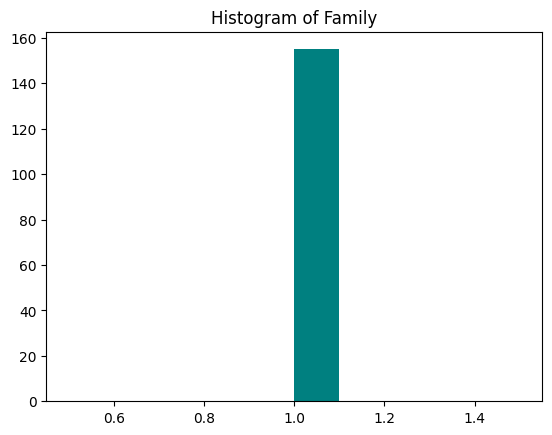

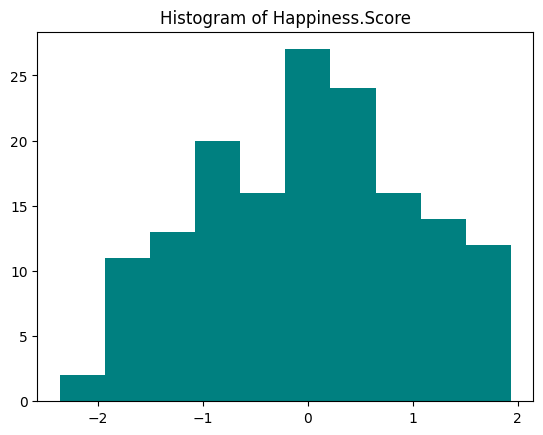

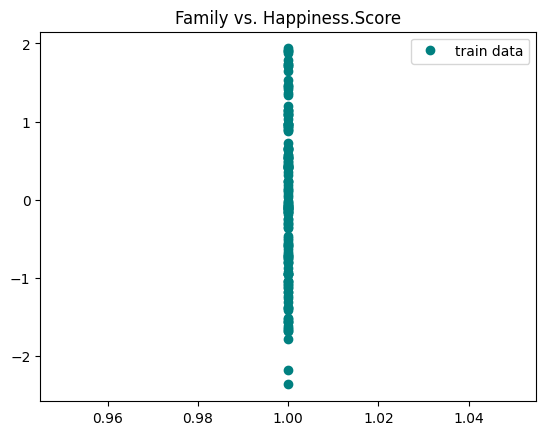

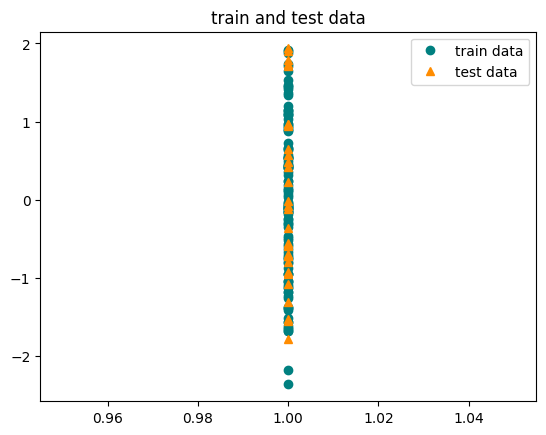

All x values are identical. Cannot compute regression.


In [31]:
filePath = "v1_world-happiness-report-2017.csv"

inputVariable = 'Family'
outputVariable = 'Happiness.Score'

make_prediction(filePath, inputVariable, outputVariable)

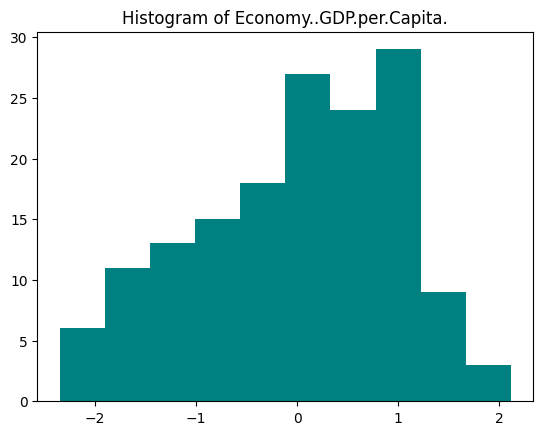

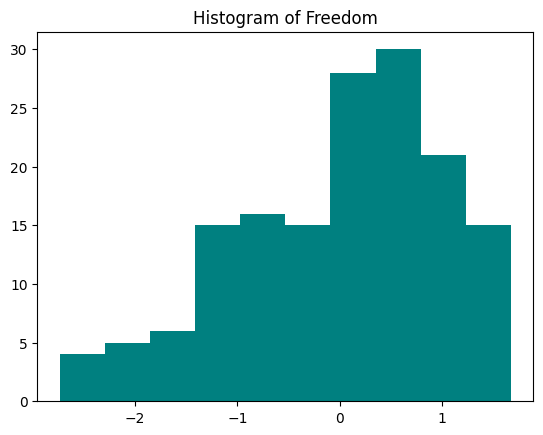

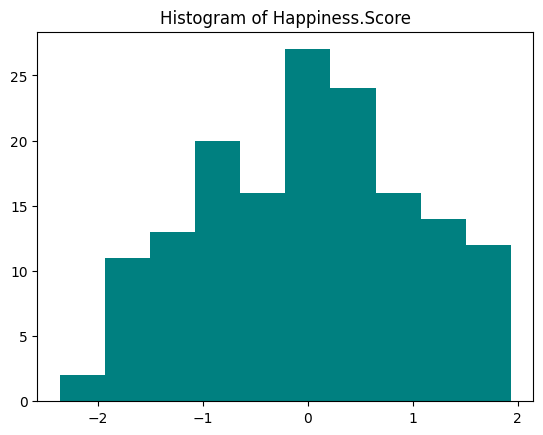

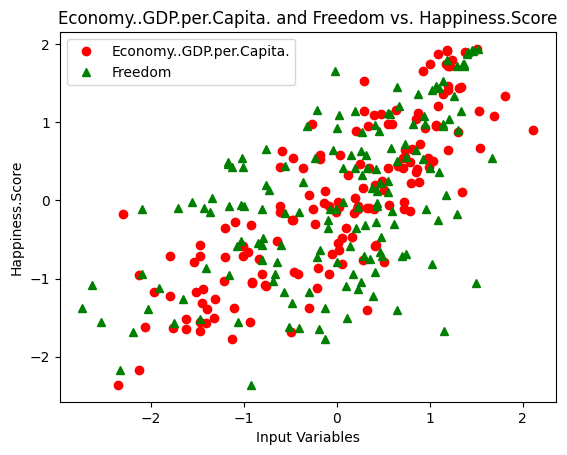

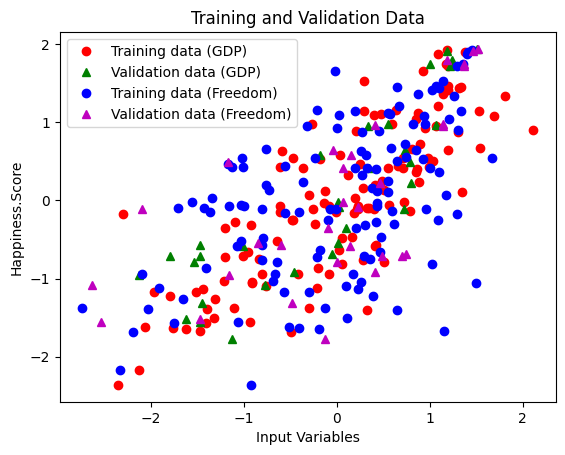

The learnt model: f(x1, x2) = -0.03251122312159553 + 0.7998814459881276 * x1 + 0.5421725375839325 * x2


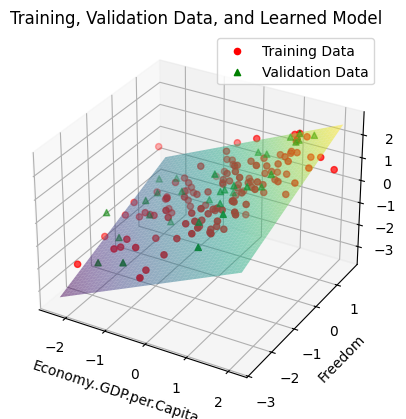

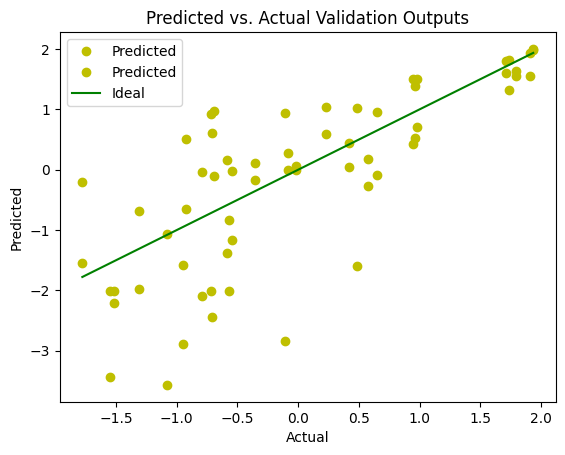

prediction error (manual):  0.6005304398723552
prediction error (tool):  0.6005304398723552


In [36]:
def run_bivariate_regression(file_path, input_var1, input_var2, output_var):

    outputs, inputs1, inputs2 = citireDate(file_path, output_var, input_var1, input_var2)

    plotDataHistogram(inputs1, input_var1)
    plotDataHistogram(inputs2, input_var2)
    plotDataHistogram(outputs, output_var)

    plt.plot(inputs1, outputs, 'ro', label=input_var1)
    plt.plot(inputs2, outputs, 'g^', label=input_var2)
    plt.xlabel('Input Variables')
    plt.ylabel(output_var)
    plt.title(f'{input_var1} and {input_var2} vs. {output_var}')
    plt.legend()
    plt.show()

    X = np.column_stack((inputs1, inputs2))

    np.random.seed(5)
    indexes = np.arange(len(inputs1))
    train_indexes = np.random.choice(indexes, int(0.8 * len(inputs1)), replace=False)
    validation_indexes = np.array([i for i in indexes if i not in train_indexes])

    train_inputs = X[train_indexes]
    train_outputs = np.array([outputs[i] for i in train_indexes])
    validation_inputs = X[validation_indexes]
    validation_outputs = np.array([outputs[i] for i in validation_indexes])

    plt.plot(train_inputs[:, 0], train_outputs, 'ro', label='Training data (GDP)')
    plt.plot(validation_inputs[:, 0], validation_outputs, 'g^', label='Validation data (GDP)')
    plt.plot(train_inputs[:, 1], train_outputs, 'bo', label='Training data (Freedom)')
    plt.plot(validation_inputs[:, 1], validation_outputs, 'm^', label='Validation data (Freedom)')
    plt.title('Training and Validation Data')
    plt.xlabel('Input Variables')
    plt.ylabel(output_var)
    plt.legend()
    plt.show()

    regressor = MyLinearBivariateRegression()
    regressor.fit(train_inputs, train_outputs)
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    print(f'The learnt model: f(x1, x2) = {w0} + {w1} * x1 + {w2} * x2')

    num_points = 1000
    x1_range = np.linspace(min(inputs1), max(inputs1), num_points)
    x2_range = np.linspace(min(inputs2), max(inputs2), num_points)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    Y = w0 + w1 * X1 + w2 * X2

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(train_inputs[:, 0], train_inputs[:, 1], train_outputs, c='r', marker='o', label='Training Data')
    ax.scatter(validation_inputs[:, 0], validation_inputs[:, 1], validation_outputs, c='g', marker='^', label='Validation Data')
    ax.plot_surface(X1, X2, Y, alpha=0.5, cmap='viridis')
    ax.set_xlabel(input_var1)
    ax.set_ylabel(input_var2)
    ax.set_zlabel(output_var)
    plt.title('Training, Validation Data, and Learned Model')
    plt.legend()
    plt.show()

    computed_outputs = regressor.predict(validation_inputs)

    plt.plot(validation_outputs, computed_outputs, 'yo', label='Predicted')
    plt.plot(validation_outputs, validation_outputs, 'g-', label='Ideal')
    plt.title('Predicted vs. Actual Validation Outputs')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()

    computed_outputs = [val[0] if isinstance(val, (list, np.ndarray)) else val for val in computed_outputs]
    validation_outputs = [val[0] if isinstance(val, (list, np.ndarray)) else val for val in validation_outputs]
 
    compute_error(validation_outputs, computed_outputs)

run_bivariate_regression(
    file_path="v1_world-happiness-report-2017.csv",
    input_var1='Economy..GDP.per.Capita.',
    input_var2='Freedom',
    output_var='Happiness.Score'
)

<h1> V2 DATA </h1> 

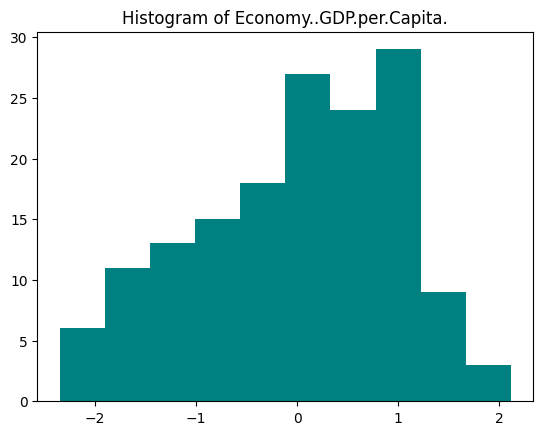

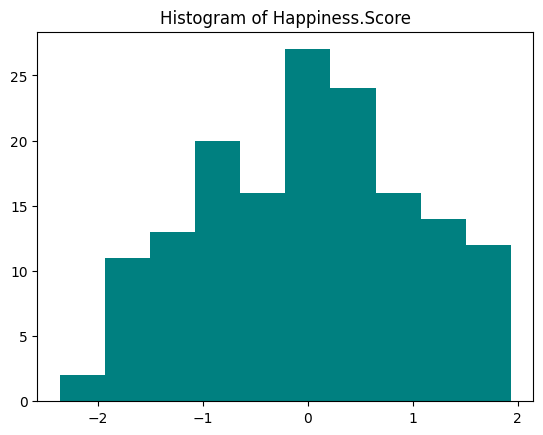

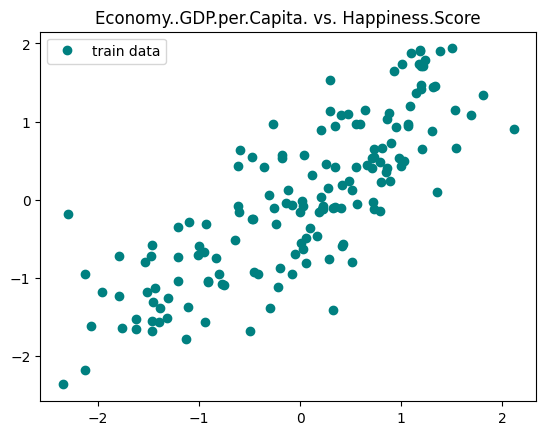

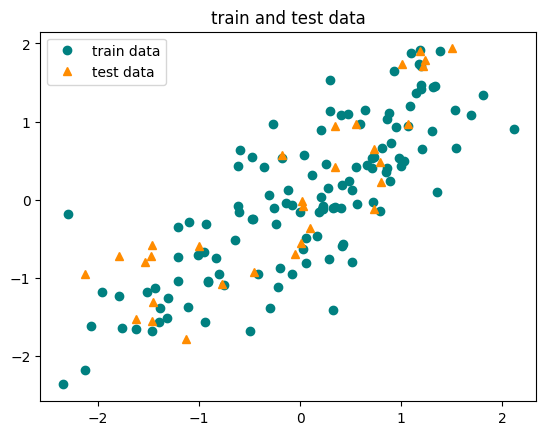

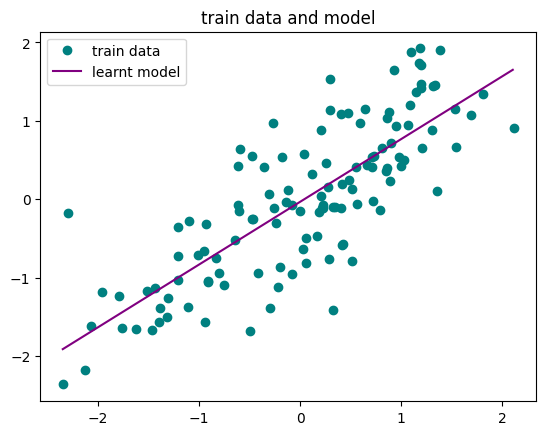

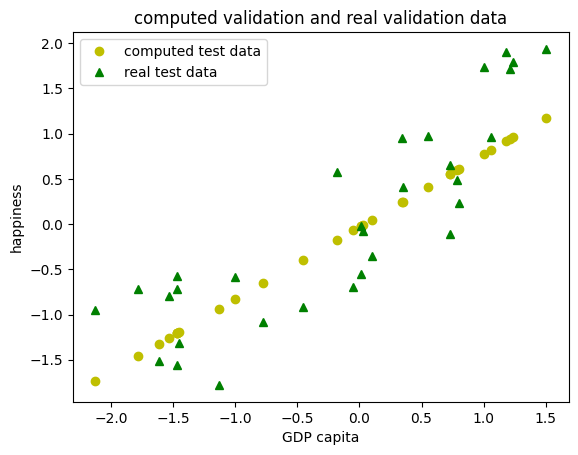

prediction error (manual):  0.32578553890299705
prediction error (tool):  0.32578553890299705


In [34]:
filePath = "v2_world-happiness-report-2017.csv"

inputVariable = 'Economy..GDP.per.Capita.'
outputVariable = 'Happiness.Score'

make_prediction(filePath, inputVariable, outputVariable)

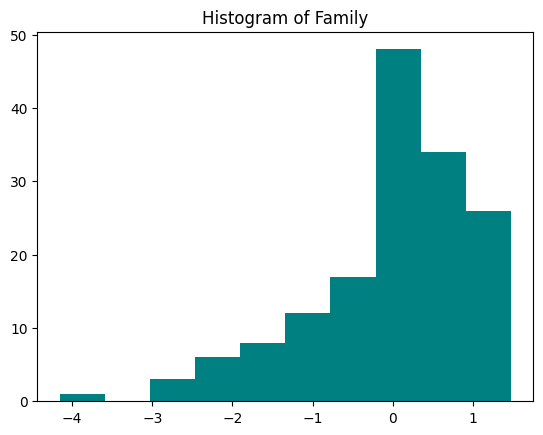

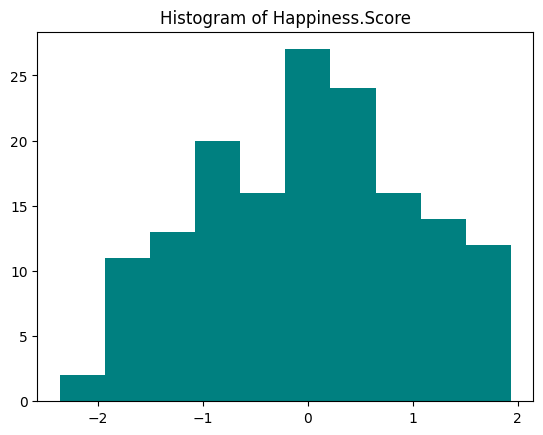

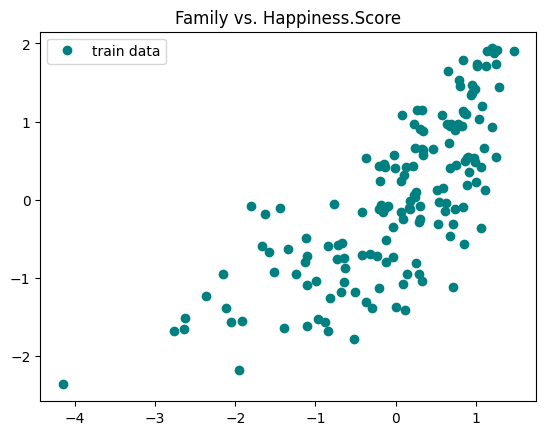

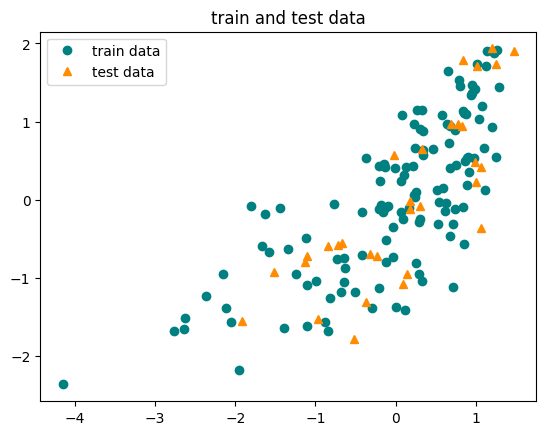

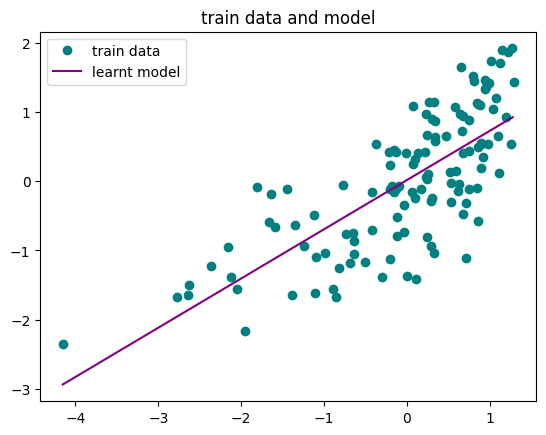

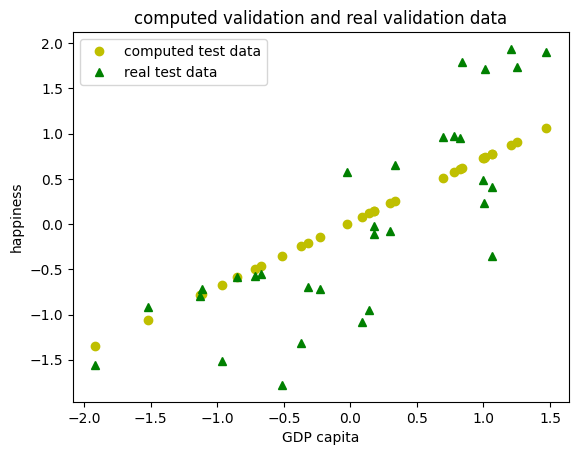

prediction error (manual):  0.47594067398735934
prediction error (tool):  0.47594067398735934


In [35]:
filePath = "v2_world-happiness-report-2017.csv"

inputVariable = 'Family'
outputVariable = 'Happiness.Score'

make_prediction(filePath, inputVariable, outputVariable)

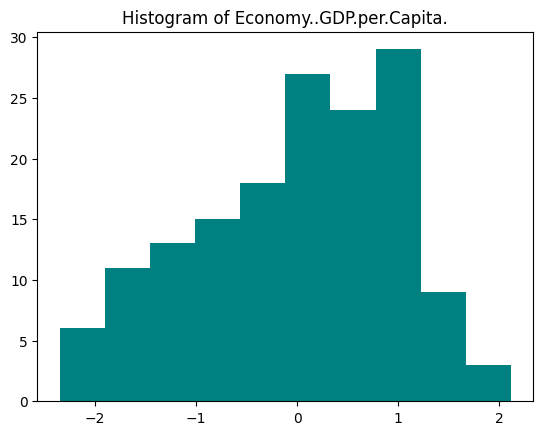

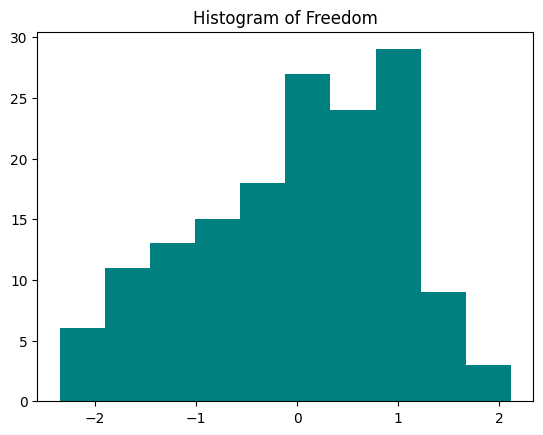

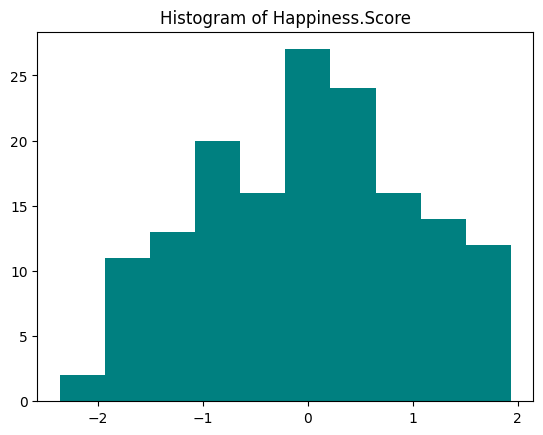

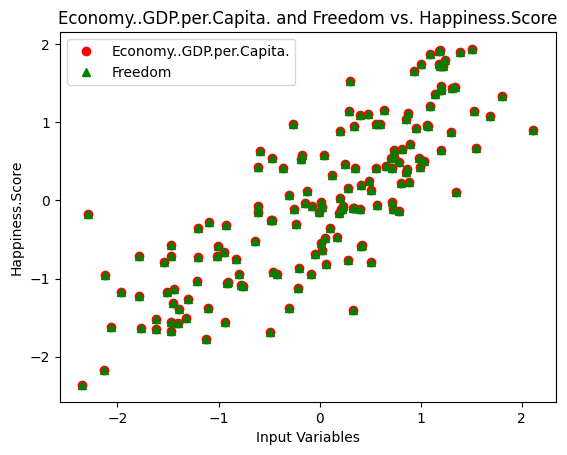

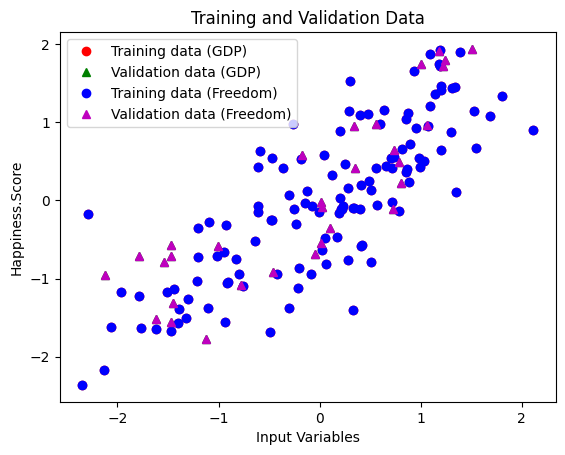

The learnt model: f(x1, x2) = -0.06317808113703892 + 0.7998814459881276 * x1 + 0.7998814460833017 * x2


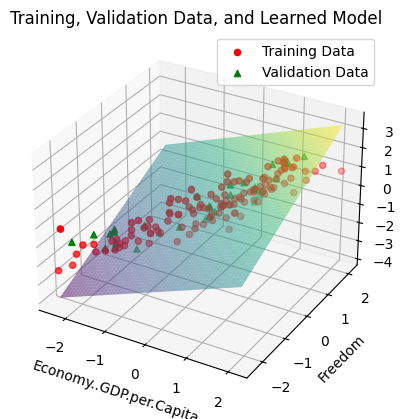

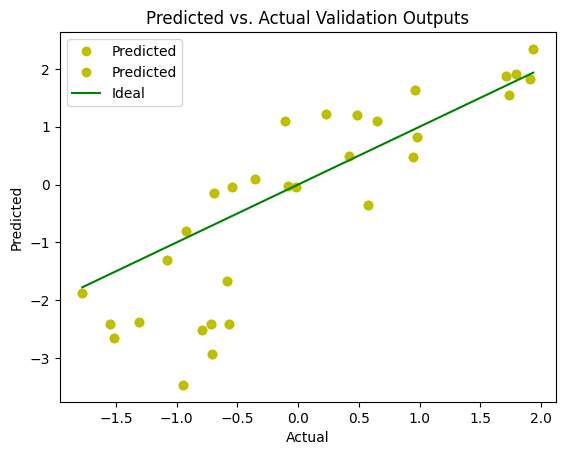

prediction error (manual):  0.9896927254936458
prediction error (tool):  0.9896927254936458


In [37]:
run_bivariate_regression(
    file_path="v2_world-happiness-report-2017.csv",
    input_var1='Economy..GDP.per.Capita.',
    input_var2='Freedom',
    output_var='Happiness.Score'
)

<h1> Varianta 3 </h1> 

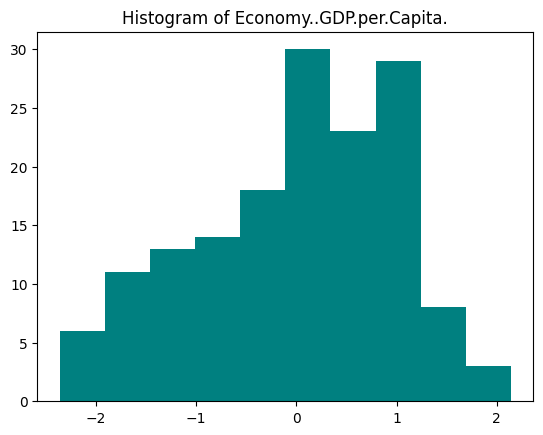

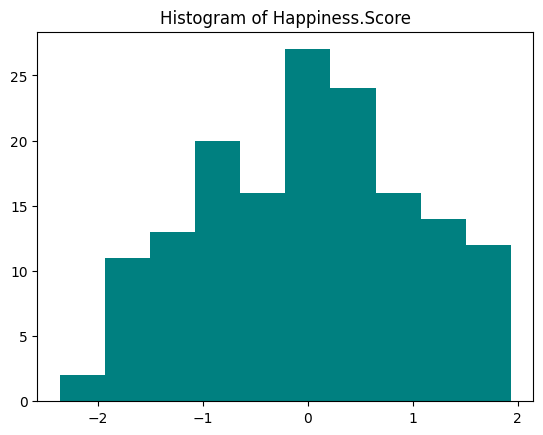

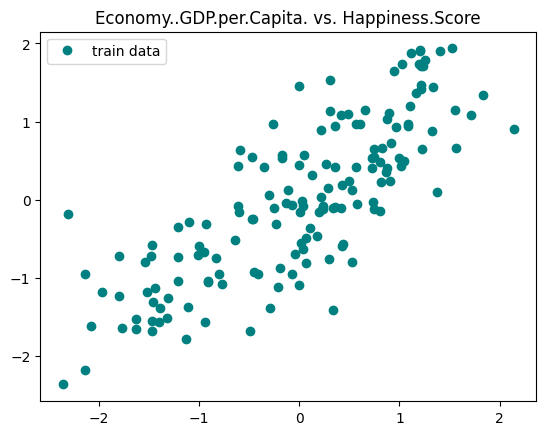

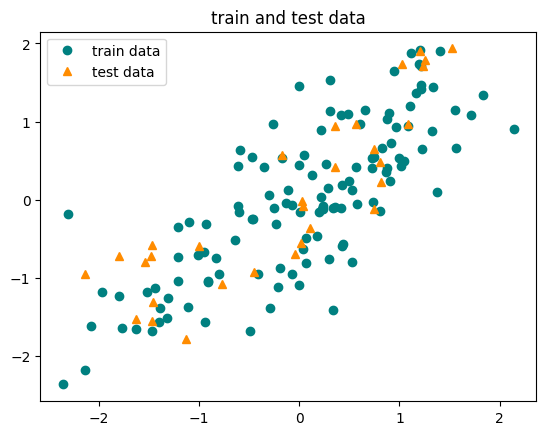

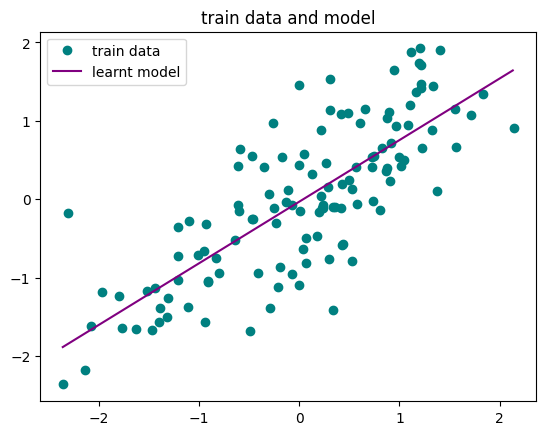

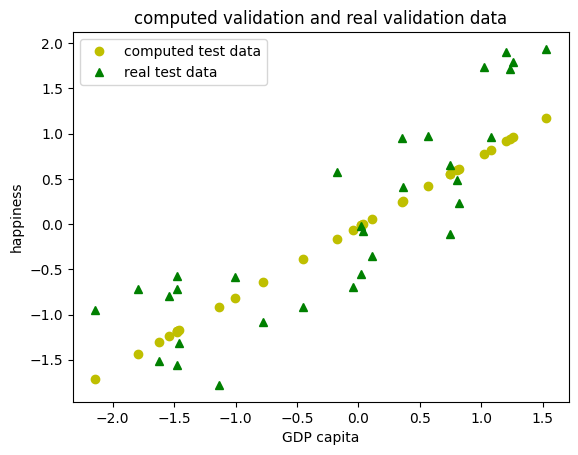

prediction error (manual):  0.3242665235322078
prediction error (tool):  0.3242665235322078


In [38]:
filePath = "v3_world-happiness-report-2017.csv"

inputVariable = 'Economy..GDP.per.Capita.'
outputVariable = 'Happiness.Score'

make_prediction(filePath, inputVariable, outputVariable)

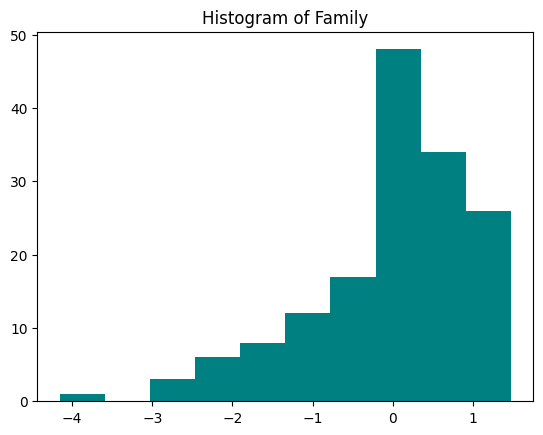

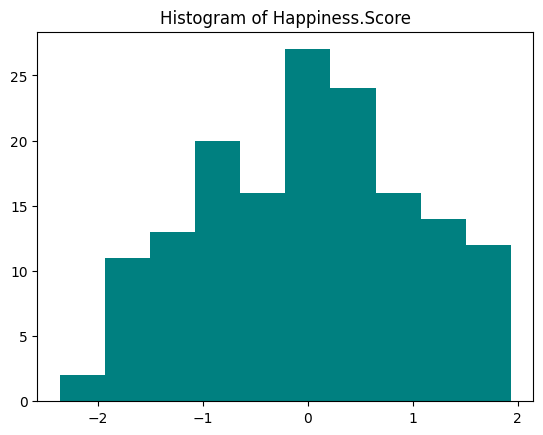

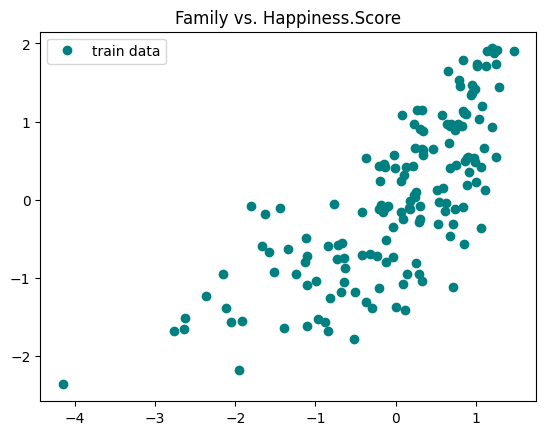

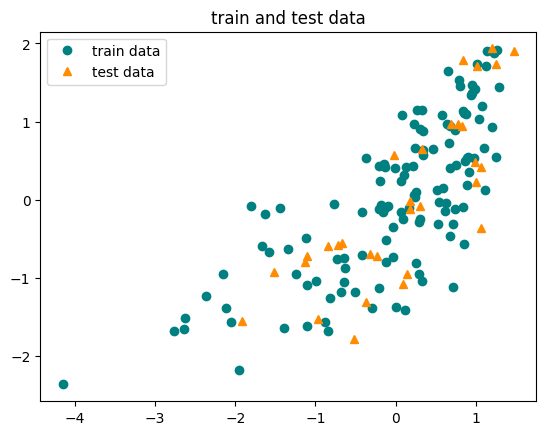

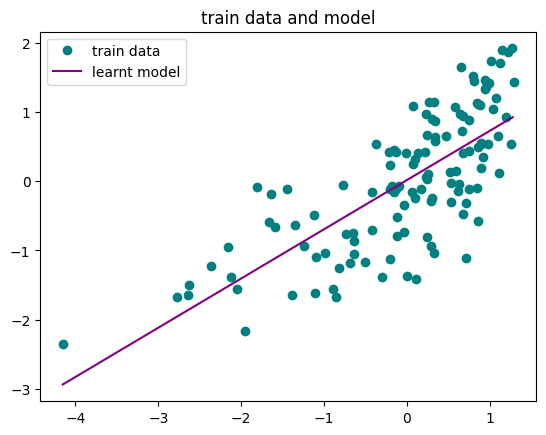

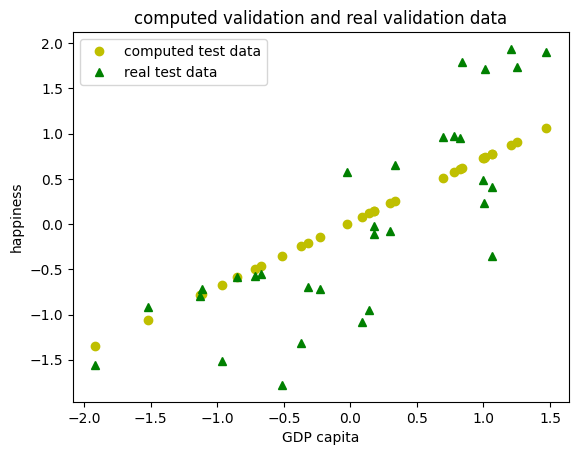

prediction error (manual):  0.47594067398735934
prediction error (tool):  0.47594067398735934


In [39]:
filePath = "v3_world-happiness-report-2017.csv"

inputVariable = 'Family'
outputVariable = 'Happiness.Score'

make_prediction(filePath, inputVariable, outputVariable)

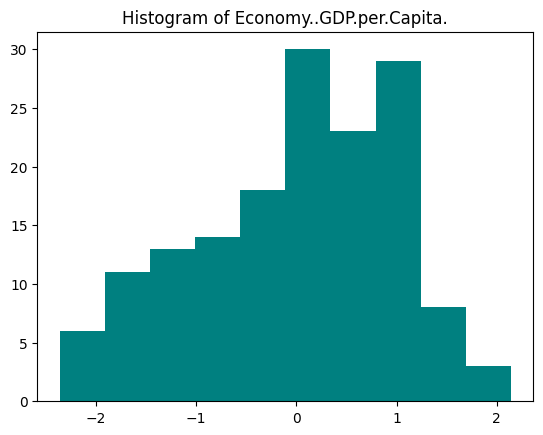

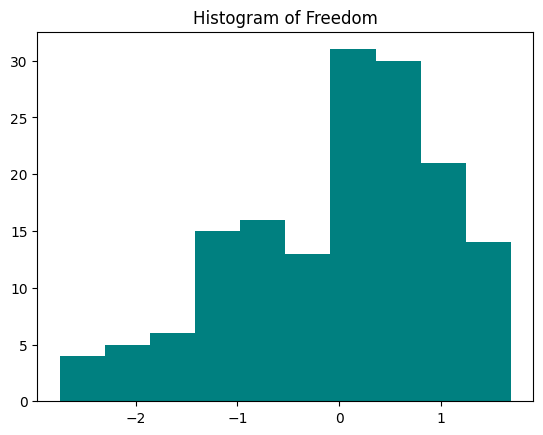

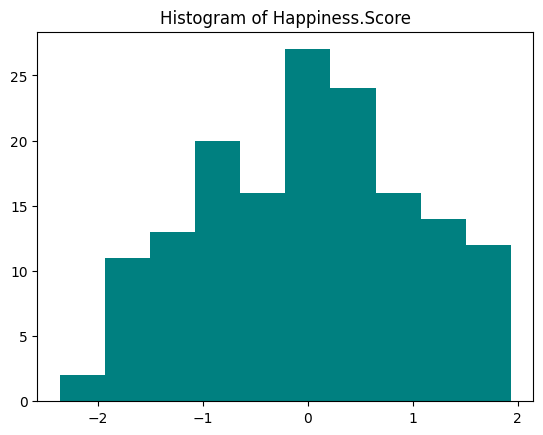

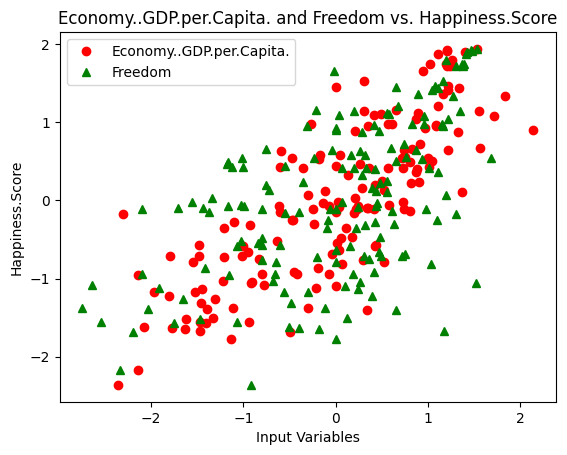

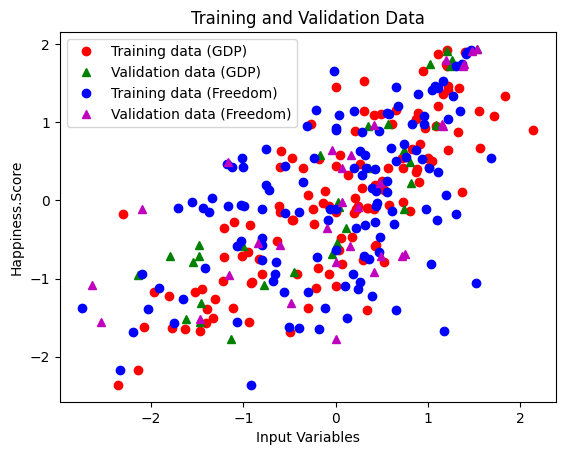

The learnt model: f(x1, x2) = -0.029182952825265066 + 0.7848965949828085 * x1 + 0.5360364126200018 * x2


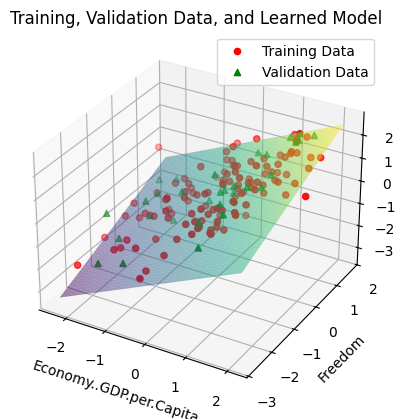

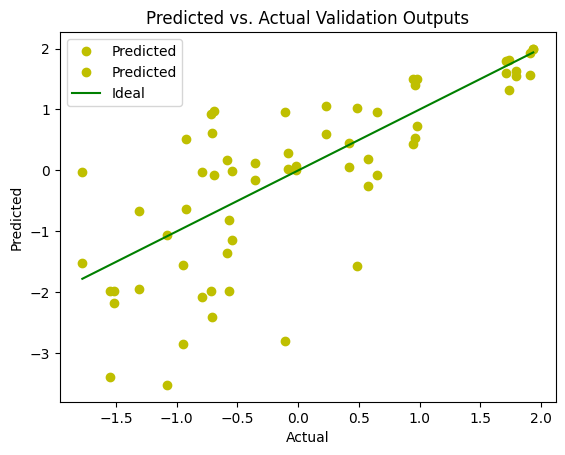

prediction error (manual):  0.5836859090477311
prediction error (tool):  0.5836859090477312


In [40]:
run_bivariate_regression(
    file_path="v3_world-happiness-report-2017.csv",
    input_var1='Economy..GDP.per.Capita.',
    input_var2='Freedom',
    output_var='Happiness.Score'
)